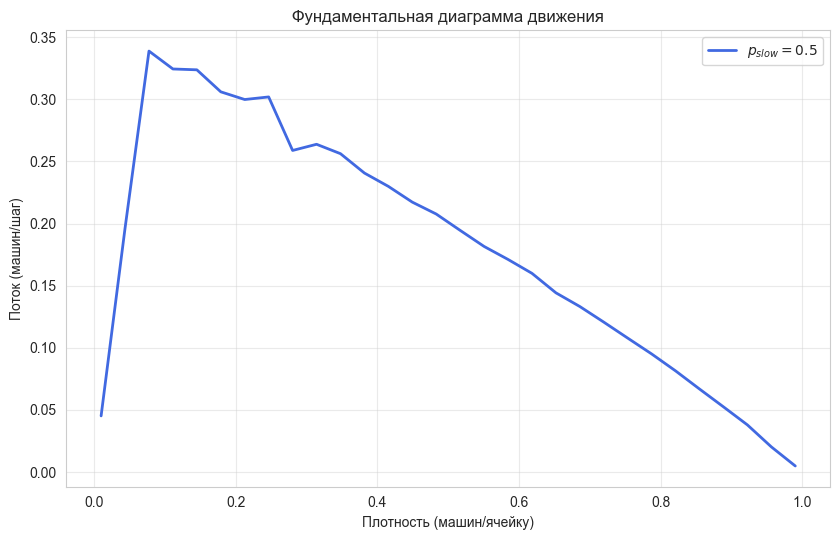

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def update(cells, v, v_max, p_slow):
    n = len(cells)
    car_pos = np.where(cells == 1)[0]
    car_pos.sort()
    num_cars = len(car_pos)

    dist = np.zeros(n, dtype=int)
    for k in range(num_cars):
        cur = car_pos[k]
        nxt = car_pos[(k + 1) % num_cars]
        gap = (nxt - cur - 1) % n
        dist[cur] = gap

    v_new = np.minimum(v + 1, v_max)
    v_new = np.minimum(v_new, dist)
    random_vals = np.random.rand(n)
    slow_mask = (cells == 1) & (random_vals < p_slow) & (v_new > 0)
    v_new[slow_mask] -= 1

    next_cells = np.zeros_like(cells)
    next_v = np.zeros_like(v)
    for cur in car_pos:
        move = v_new[cur]
        new_pos = (cur + move) % n
        if next_cells[new_pos] == 0:
            next_cells[new_pos] = 1
            next_v[new_pos] = v_new[cur]
        else:
            next_cells[cur] = 1
            next_v[cur] = 0

    return next_cells, next_v

N_cell = 2000
T_equil = 50
T_sim = 2000
v_max = 5
p_slow = 0.5

densities = np.linspace(0.01, 0.99, 30)
flows = []

for rho in densities:
    N_cars = int(rho * N_cell)
    cells = np.zeros(N_cell, dtype=int)
    car_indices = np.random.choice(N_cell, N_cars, replace=False)
    cells[car_indices] = 1

    v = np.random.randint(0, v_max + 1, size=N_cell)
    v[cells == 0] = 0

    speeds = []
    for t in range(T_sim + T_equil):
        cells, v = update(cells, v, v_max, p_slow)
        if t >= T_sim:
            speeds.append(np.sum(v[cells == 1]))

    avg_v = np.mean(speeds) / N_cars if N_cars > 0 else 0
    q = rho * avg_v
    flows.append(q)

plt.figure(figsize=(8.5, 5.5))
plt.plot(densities, flows, lw=2, color='royalblue', label=r'$p_{slow}=0.5$')
plt.xlabel('Плотность (машин/ячейку)')
plt.ylabel('Поток (машин/шаг)')
plt.title('Фундаментальная диаграмма движения')
plt.grid(True, alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

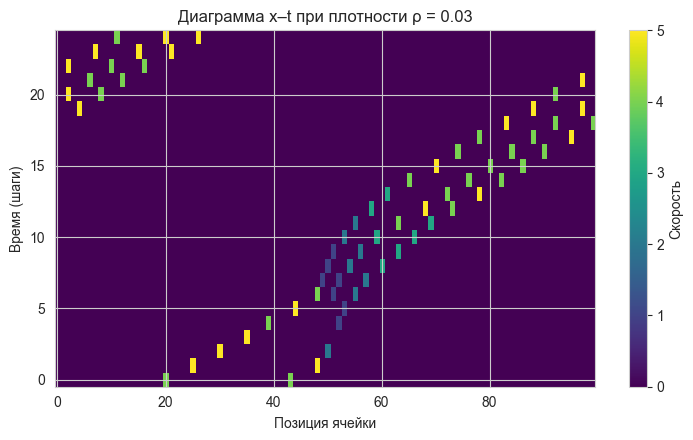

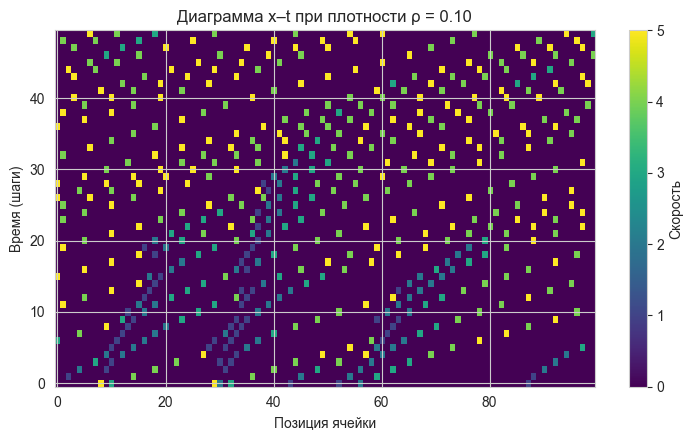

In [2]:
def xt_diagram(num_cells=100, num_cars=3, n_steps=25, v_max=5, p_slow=0.5):
    road = np.zeros(num_cells, dtype=int)
    car_positions = np.random.choice(num_cells, num_cars, replace=False)
    road[car_positions] = 1

    v = np.random.randint(0, v_max + 1, size=num_cells)
    v[road == 0] = 0

    timeline = np.zeros((n_steps, num_cells), dtype=int)
    for step in range(n_steps):
        timeline[step] = v
        road, v = update(road, v, v_max, p_slow)

    return timeline

cases = [(0.03, 25), (0.1, 50)]
for density, steps in cases:
    n_cars = int(100 * density)
    data = xt_diagram(num_cells=100, num_cars=n_cars, n_steps=steps,
                      v_max=5, p_slow=0.5)

    plt.figure(figsize=(7.5, 4.5))
    plt.imshow(data, cmap='viridis', interpolation='nearest',
               origin='lower', aspect='auto')
    plt.colorbar(label='Скорость')
    plt.xlabel('Позиция ячейки')
    plt.ylabel('Время (шаги)')
    plt.title(f'Диаграмма x–t при плотности ρ = {density:.2f}')
    plt.tight_layout()
    plt.show()


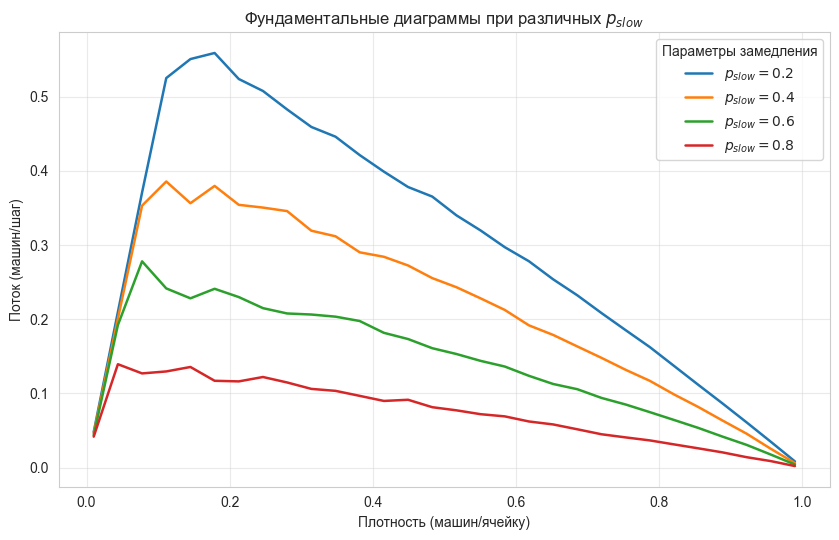

In [3]:
def update(road, v, vmax, p_slow):
    n = len(road)
    car_idx = np.where(road == 1)[0]
    car_idx.sort()
    num_cars = len(car_idx)
    gaps = np.zeros(n, dtype=int)

    for k in range(num_cars):
        cur = car_idx[k]
        nxt = car_idx[(k + 1) % num_cars]
        gaps[cur] = (nxt - cur - 1) % n

    v_new = np.minimum(v + 1, vmax)
    v_new = np.minimum(v_new, gaps)
    rnd = np.random.rand(n)
    mask = (road == 1) & (rnd < p_slow) & (v_new > 0)
    v_new[mask] -= 1

    new_road = np.zeros_like(road)
    new_v = np.zeros_like(v)
    for cur in car_idx:
        move = v_new[cur]
        nxt = (cur + move) % n
        if new_road[nxt] == 0:
            new_road[nxt] = 1
            new_v[nxt] = v_new[cur]
        else:
            new_road[cur] = 1
            new_v[cur] = 0

    return new_road, new_v

num_cells = 2000
warmup_steps = 50
sim_steps = 2000
vmax = 5
p_slow_values = [0.2, 0.4, 0.6, 0.8]
densities = np.linspace(0.01, 0.99, 30)

plt.figure(figsize=(8.5, 5.5))

for p in p_slow_values:
    flow_values = []
    for rho in densities:
        num_cars = int(rho * num_cells)
        road = np.zeros(num_cells, dtype=int)
        pos = np.random.choice(num_cells, num_cars, replace=False)
        road[pos] = 1

        v = np.random.randint(0, vmax + 1, size=num_cells)
        v[road == 0] = 0

        speed_sum = []
        for t in range(sim_steps + warmup_steps):
            road, v = update(road, v, vmax, p)
            if t >= sim_steps:
                speed_sum.append(np.sum(v[road == 1]))

        mean_speed = np.mean(speed_sum) / num_cars if num_cars > 0 else 0
        q = rho * mean_speed
        flow_values.append(q)

    plt.plot(densities, flow_values, lw=1.8, label=fr'$p_{{slow}}={p}$')

plt.title('Фундаментальные диаграммы при различных $p_{slow}$')
plt.xlabel('Плотность (машин/ячейку)')
plt.ylabel('Поток (машин/шаг)')
plt.grid(alpha=0.4)
plt.legend(title='Параметры замедления')
plt.tight_layout()
plt.show()


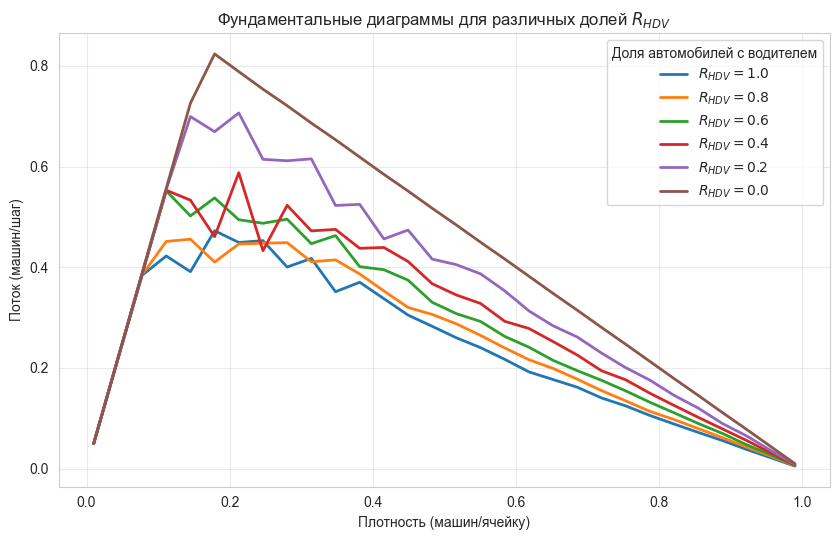

In [4]:
def update(road, v, vmax, p_slow_map):
    n = len(road)
    car_positions = np.where(road == 1)[0]
    car_positions.sort()
    num_cars = len(car_positions)
    dist = np.zeros(n, dtype=int)

    for k in range(num_cars):
        cur = car_positions[k]
        nxt = car_positions[(k + 1) % num_cars]
        dist[cur] = (nxt - cur - 1) % n

    v_new = np.minimum(v + 1, vmax)
    v_new = np.minimum(v_new, dist)
    rand = np.random.rand(n)
    mask = (road == 1) & (rand < p_slow_map) & (v_new > 0)
    v_new[mask] -= 1

    new_road = np.zeros_like(road)
    new_v = np.zeros_like(v)
    for cur in car_positions:
        move = v_new[cur]
        nxt = (cur + move) % n
        if new_road[nxt] == 0:
            new_road[nxt] = 1
            new_v[nxt] = v_new[cur]
        else:
            new_road[cur] = 1
            new_v[cur] = 0

    return new_road, new_v

num_cells = 2000
warmup = 50
sim_time = 2000
vmax = 5
p_human = 0.5
densities = np.linspace(0.01, 0.99, 30)
R_values = [1.0, 0.8, 0.6, 0.4, 0.2, 0.0]

plt.figure(figsize=(8.5, 5.5))

for share_HDV in R_values:
    flow_data = []
    for rho in densities:
        n_cars = int(rho * num_cells)
        road = np.zeros(num_cells, dtype=int)
        car_idx = np.random.choice(num_cells, n_cars, replace=False)
        road[car_idx] = 1

        v = np.random.randint(0, vmax + 1, size=num_cells)
        v[road == 0] = 0

        p_map = np.zeros(num_cells)
        n_hum = int(share_HDV * n_cars)
        if n_hum > 0:
            human_cars = np.random.choice(car_idx, n_hum, replace=False)
            p_map[human_cars] = p_human

        total_speeds = []
        for t in range(sim_time + warmup):
            road, v = update(road, v, vmax, p_map)
            if t >= sim_time:
                total_speeds.append(np.sum(v[road == 1]))

        mean_speed = np.mean(total_speeds) / n_cars if n_cars > 0 else 0
        flow = rho * mean_speed
        flow_data.append(flow)

    plt.plot(densities, flow_data, lw=2,
             label=fr'$R_{{HDV}} = {share_HDV:.1f}$')

plt.title('Фундаментальные диаграммы для различных долей $R_{HDV}$')
plt.xlabel('Плотность (машин/ячейку)')
plt.ylabel('Поток (машин/шаг)')
plt.grid(alpha=0.4)
plt.legend(title='Доля автомобилей с водителем')
plt.tight_layout()
plt.show()

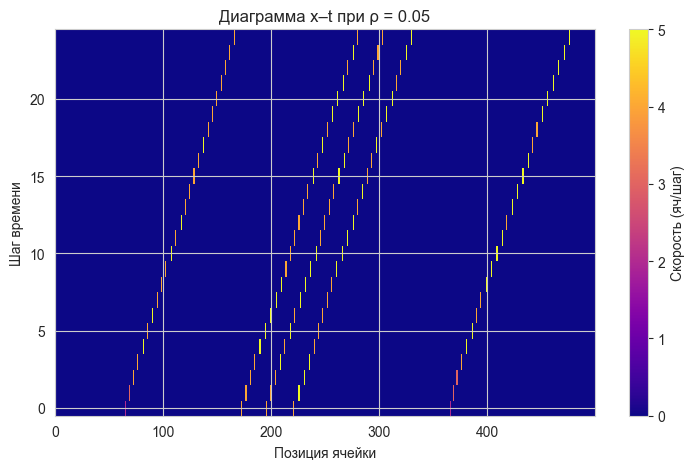

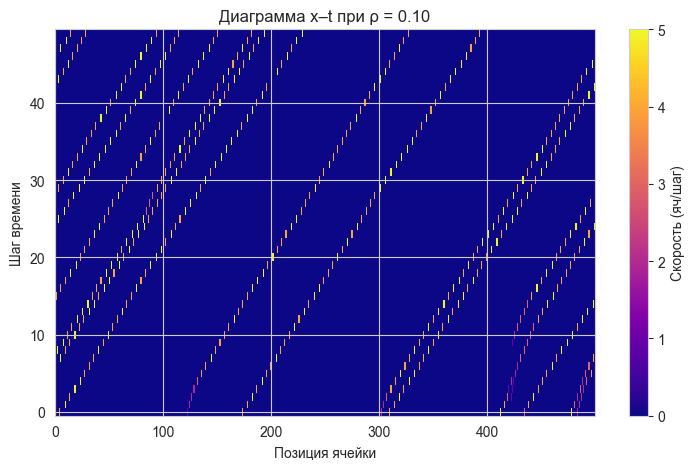

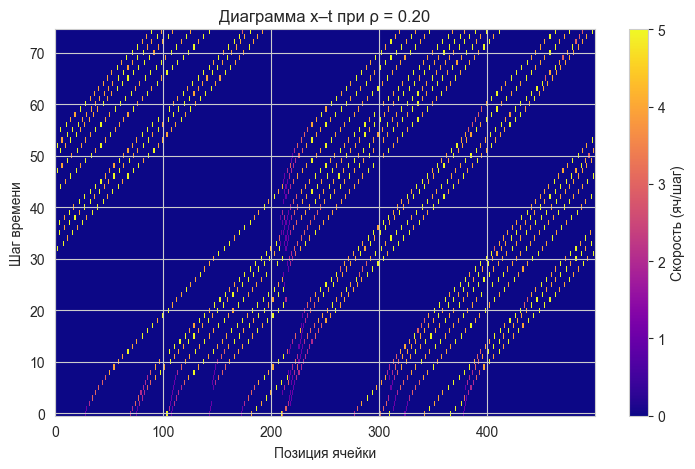

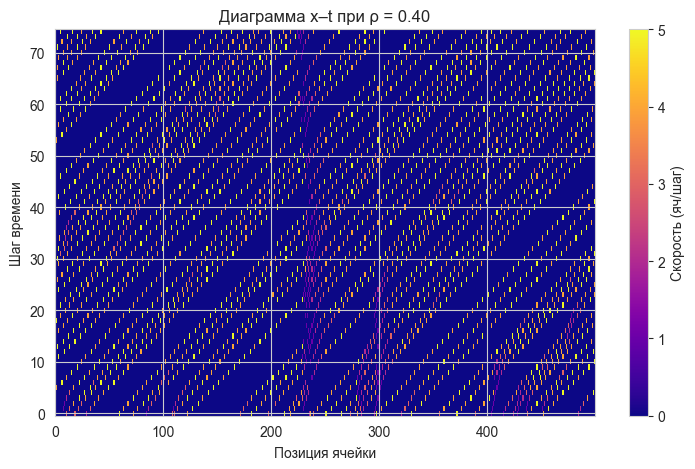

In [5]:
def xt_diagram(num_cells=100, num_cars=3, n_steps=25, vmax=5, p_slow=0.5):
    road = np.zeros(num_cells, dtype=int)
    car_positions = np.random.choice(num_cells, num_cars, replace=False)
    road[car_positions] = 1

    v = np.random.randint(0, vmax + 1, size=num_cells)
    v[road == 0] = 0

    timeline = np.zeros((n_steps, num_cells), dtype=int)
    for step in range(n_steps):
        timeline[step] = v
        road, v = update(road, v, vmax, p_slow)

    return timeline

cases = [(0.05, 25), (0.1, 50), (0.2, 75), (0.4, 75)]
for density, n_steps in cases:
    num_cars = int(100 * density)
    result = xt_diagram(num_cells=500, num_cars=num_cars,
                        n_steps=n_steps, vmax=5, p_slow=0.5)

    plt.figure(figsize=(7.5, 4.8))
    plt.imshow(result, cmap='plasma', origin='lower',
               aspect='auto', interpolation='none')
    plt.colorbar(label='Скорость (яч/шаг)')
    plt.xlabel('Позиция ячейки')
    plt.ylabel('Шаг времени')
    plt.title(f'Диаграмма x–t при ρ = {density:.2f}')
    plt.tight_layout()
    plt.show()
